<a href="https://colab.research.google.com/github/kleeresearch/training/blob/main/cssa_s2_geospatial_analysis2_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UD CSSA Training Session 2: Geospatial Analysis 
----

Date: 11/10/2022 

Instructor: Kyungmin Lee 

**Step 1. Load and explore data**
  - geodataframe from World Bank 
  - pandas dataframe using World Bank's API

**Step 2. Data manipulation**
  - Note difference of joining data: geodataframe to pandas, geodataframe to geodataframe 

**Step 3. Data visualization**
  - Plotting map and see difference of joining data functions: outer and inner  
  - Plotting multiple maps

**Bonus. Focus on continents**
  - Subset by continents 


## Step 1: Load and Explore Data

We will use [WB API]("https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html") to load world map and CO2 intensity data.



In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.6 MB/s 
     |████████████████████████████████| 6.3 MB 36.3 MB/s 
     |████████████████████████████████| 16.7 MB 204 kB/s 


In [12]:
from pandas_datareader import wb
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

In [85]:
# -- Set default function for loading datasets
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 300)
pd.set_option("display.width", 1000)

## Load geodataframe

Note: you can also find the [world map]("https://datacatalog.worldbank.org/search/dataset/0038272") from the WB opendata platform.

In [13]:
# -- Load geodataframe
map = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [14]:
# -- Check geodataframe whether it can be used as a base map
map['continent'].value_counts() 

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

In [16]:
# -- Check type of the dataset
type(map_sub)

geopandas.geodataframe.GeoDataFrame

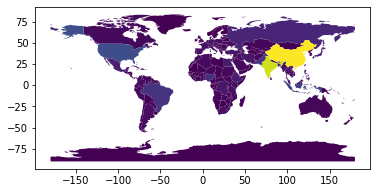

In [71]:
map_sub.plot('pop_est')

In [15]:
# -- Data manipulation 

# -- Exclude Antartica to see continents more apparent in map 
map_sub = map[map["name"] != 'Antartica']
# -- Set index as name
map_sub = map_sub.set_index('name')
# -- Change column name (2nd way to rename columns)
index_change = {'United States of America': 'United States', 'Russia': 'Russian Federation'}
map_sub = map_sub.rename(index=index_change)

map_sub

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


We can find data of population, GDP, and map polygons. But what if I want to plot that is not included in the geodataframe? This is why we need "spatial join" function to merge datasets. Let's load data we want to plot. I will load CO2 intensity data from World Bank (WB) opendata platform using its own Application Programming Interface (API). 

## Load pandas dataframe using WB API

Note: you can also find the [CO2 intensity data]("https://data.worldbank.org/indicator/EN.ATM.CO2E.EG.ZS") from WB opendata platform website

In [63]:
# -- Load raw dataset I want to see (e.g. CO2 intensity) 
data = wb.download(indicator="EN.ATM.CO2E.EG.ZS", country="all", start=1950,end=2019)
data

EN.ATM.CO2E.EG.ZS
country                     year                   
Africa Eastern and Southern 2019                NaN
                            2018                NaN
                            2017                NaN
                            2016                NaN
                            2015                NaN
...                                             ...
Zimbabwe                    1964                NaN
                            1963                NaN
                            1962                NaN
                            1961                NaN
                            1960                NaN

[15960 rows x 1 columns]

In [64]:
# -- Data manipulation 

# -- Reset index as country
data = data.reset_index(1)
# -- Rename columns 
data.columns = ['CO2_year', 'CO2_intensity'] # Be careful to rename it without space

data

,CO2_year,CO2_intensity
country,,
Africa Eastern and Southern,2019,NaN
Africa Eastern and Southern,2018,NaN
Africa Eastern and Southern,2017,NaN
Africa Eastern and Southern,2016,NaN
Africa Eastern and Southern,2015,NaN
...,...,...
Zimbabwe,1964,NaN
Zimbabwe,1963,NaN
Zimbabwe,1962,NaN


In [65]:
# -- Check type of the dataset
type(data)

pandas.core.frame.DataFrame

We can find out the types of data sets are different. Map dataset is based on geodataframe and CO2 intensity data is based on pandas dataframe. In this case, we need to use function of "data_join". 



#### FYI, note for spatial join

In an attribute join, a GeoSeries or GeoDataFrame is combined with a regular pandas.Series or pandas.DataFrame based on a common variable.
https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

* **data_join = geodataframe.join(pandas.dataframe)** 


* **data_spatial join = gpd.sjoin(geodataframe, geodataframe)** 

(e.g.) join = gpd.sjoin(addresses, pop, how="inner", op="within")

https://automating-gis-processes.github.io/CSC18/lessons/L4/spatial-join.html


* **GeoDataFrame.sjoin(): joins based on binary predicates (intersects, contains, etc.)**

* **GeoDataFrame.sjoin_nearest(): joins based on proximity, with the ability to set a maximum search radius.**



## Step 2: Spatial join datasets

Let's spatial join two datasets (map and CO2 intensity data). There are two representative options of spatial join: outer and inner. Codes below are to check how map looks different depending on how dataframes are joined.

[Spatial join options desctiprion]("https://geopandas.org/en/stable/gallery/spatial_joins.html")

**Option 1. how='outer'** 
- join as right column 
- preserve continents data 
- but include Antartica data (Need to manipulate data or change sjoin options)

**Option 2. how='inner'**
- join intersects columns 
- lost some continents data that are not included in new pandas dataframe

In [79]:
# -- Join by "inner" function
data_ji = map_sub.join(data, how='inner') # join interconnected columns
data_ji

,pop_est,continent,iso_a3,gdp_md_est,geometry,CO2_year,CO2_intensity
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2019,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2018,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2017,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2016,NaN
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2015,NaN
...,...,...,...,...,...,...,...
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1964,NaN
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1963,NaN
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1962,NaN
Zimbabwe,13805084,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1961,NaN


Text(0.0, 1.0, 'Population Level by Country')

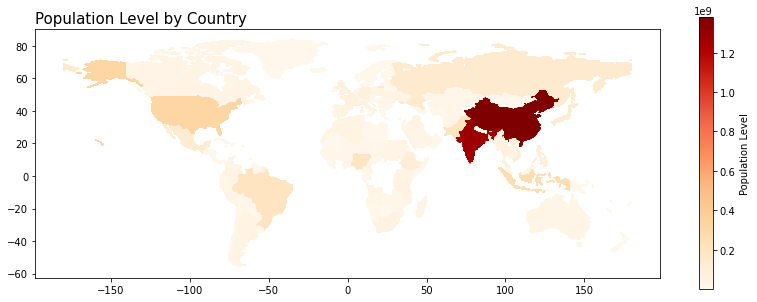

In [81]:
# -- Plotting "innter" functioned dataframe
data_ji.plot('pop_est', legend=True, legend_kwds={'label': "Population Level", 'orientation': "vertical"}, cmap = 'OrRd', figsize=(14,5))
plt.title("Population Level by Country", loc = "left", fontsize=15)

In [78]:
# -- Join by "outer" function
data_jo = map_sub.join(data, how='outer') 
data_jo

,pop_est,continent,iso_a3,gdp_md_est,geometry,CO2_year,CO2_intensity
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2019,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2018,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2017,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2016,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2015,NaN
...,...,...,...,...,...,...,...
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1963,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1962,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1961,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1960,NaN


Text(0.0, 1.0, 'Population Level by Country')

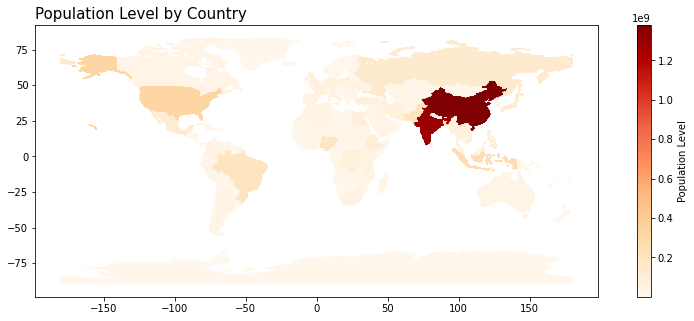

In [82]:
# -- Plotting "outer" functioned dataframe
data_jo.plot('pop_est', legend=True, legend_kwds={'label': "Population Level", 'orientation': "vertical"}, cmap = 'OrRd', figsize=(14,5))
plt.title("Population Level by Country", loc = "left", fontsize=15)

Do you find difference of 'inner' and 'outer'?  What is that? Note that the function of spatial join dataframes are important during data manuipulation stage.  

#Step3. Data visualization

Note that it is hard to see difference by countries. This is why need data visualization stage. Let's do a simple example of using quantiles and plotting multiple datas in one frame.

Text(0.0, 1.0, 'CO2 Intensity Level by Country')

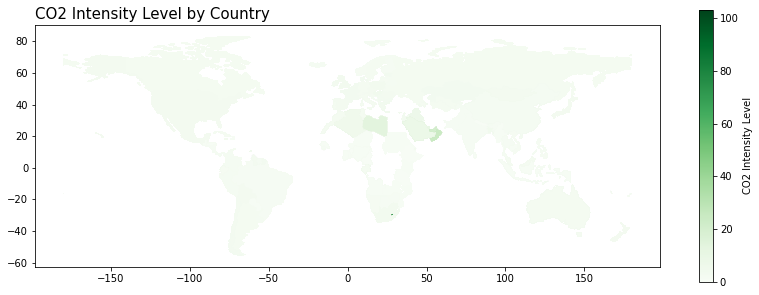

In [84]:
# -- Plotting
data_jo.plot("CO2_intensity", legend=True, legend_kwds={'label': "CO2 Intensity Level", 'orientation': "vertical"}, cmap = 'Greens', figsize=(14,5))
plt.title("CO2 Intensity Level by Country", loc = "left", fontsize=15)

Let's use quantile to view map more clearly

In [ ]:
# -- Install for quantile function
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.0, 1.0, 'CO2 Intensity Level by Country')

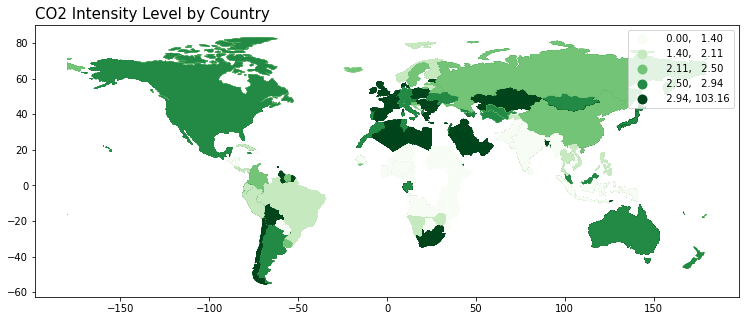

In [83]:
# -- Plotting 
data_jo.plot('CO2_intensity', legend=True, 
             cmap = 'Greens', scheme = "quantiles", figsize=(14,5))
plt.title("CO2 Intensity Level by Country", loc = "left", fontsize=15)

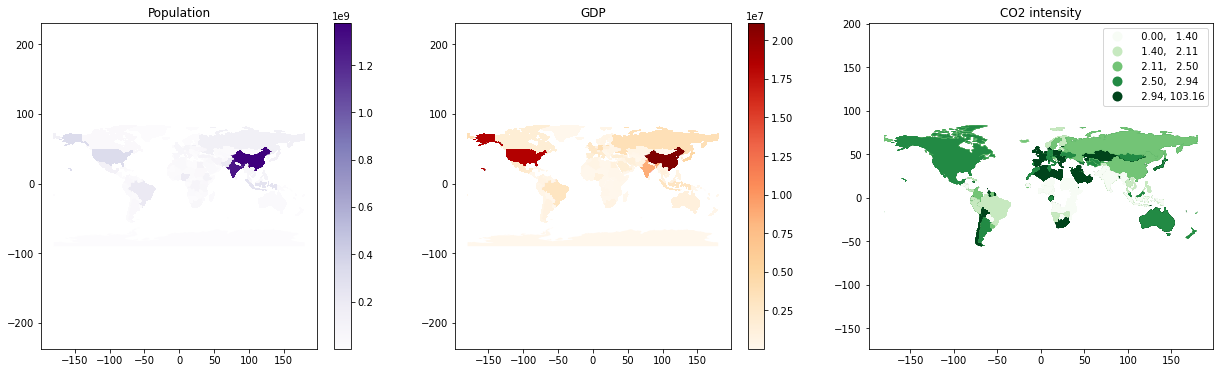

In [26]:
# -- Plotting multiple datasets at the same time

fig, ax = plt.subplots(1,3, figsize=(21,6))

data_jo.plot("pop_est", ax=ax[0], cmap="Purples", legend=True)
ax[0].set_title("Population")
#ax[0].axis(aspect="auto") # make colorbar equal when plot maps horizontally
ax[0].axis("equal")

data_jo.plot('gdp_md_est', ax=ax[1], cmap="OrRd", legend=True)
ax[1].set_title("GDP")
#ax[1].axis(aspect="auto")
ax[1].axis("equal")

data_jo.plot('CO2_intensity', ax=ax[2], cmap="Greens", legend=True, scheme="quantiles")
ax[2].set_title("CO2 intensity")
#ax[2].legend(loc = 'lower left')
#ax[2].axis(aspect="auto")
ax[2].axis("equal")

plt.show()

# Bonus: Focus on continents

What if I want to see the map by continents? Let's subset the dataframes by continents.


In [29]:
# -- Load data
data_jo

,pop_est,continent,iso_a3,gdp_md_est,geometry,CO2_year,CO2_intensity
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2019,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2018,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2017,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2016,NaN
Afghanistan,34124811.0,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2015,NaN
...,...,...,...,...,...,...,...
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1963,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1962,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1961,NaN
Zimbabwe,13805084.0,Africa,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1960,NaN


In [50]:
# -- Subset dataframe by continents
asia = data_jo[data_jo.continent == 'Asia']
africa = data_jo[data_jo.continent == 'Africa']
europe = data_jo[data_jo.continent == 'Europe']
asia.shape, africa.shape, europe.shape

((2112, 7), (2411, 7), (2163, 7))

In [32]:
# -- Fit colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable

Text(0.0, 1.0, 'Population Level by Country in Asia')

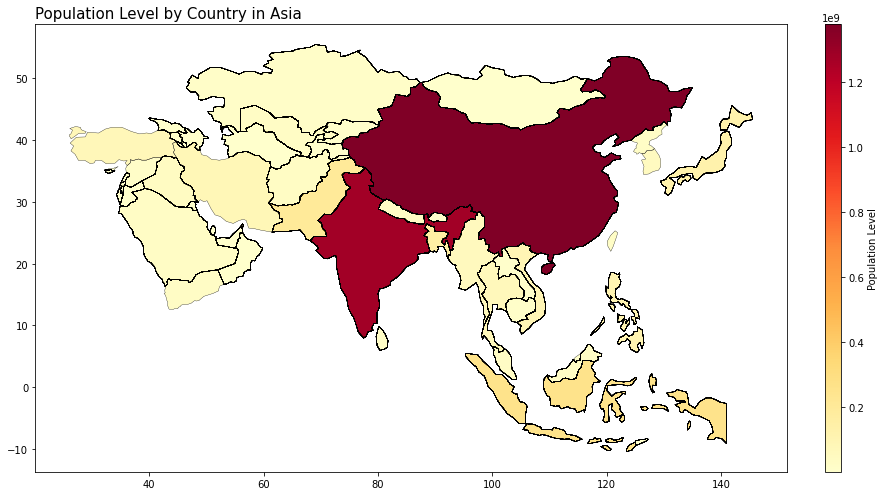

In [39]:
# -- Plotting 
fig, ax = plt.subplots(figsize=(15,15))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

asia.plot(ax=ax, color="gray", alpha=0.2)
asia.boundary.plot(ax=ax, color="black", lw=0.3)
asia.plot('pop_est', ax=ax, cmap="YlOrRd", 
               legend=True, cax=cax, 
               legend_kwds={'label': "Population Level", 'orientation': "vertical"})

ax.set_title('Population Level by Country in Asia', loc = 'left', fontsize=15)

Text(0.0, 1.0, 'CO2 Intensity Level by Country in Africa')

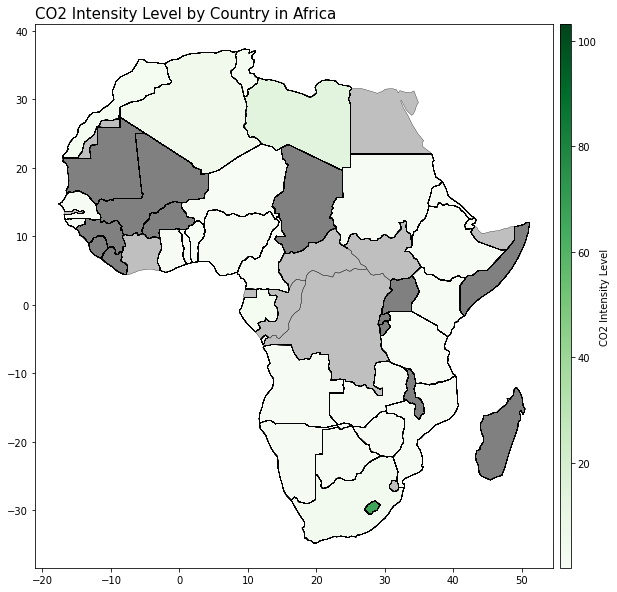

In [62]:
# -- Plotting
fig, ax = plt.subplots(figsize=(10,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

africa.plot(ax=ax, color="gray", alpha=0.5)
africa.boundary.plot(ax=ax, color="black", lw=0.3)
africa.plot('CO2_intensity', ax=ax, cmap="Greens", 
               legend=True, cax=cax,
               legend_kwds={'label': "CO2 Intensity Level", 'orientation': "vertical"})

ax.set_title('CO2 Intensity Level by Country in Africa', loc = 'left', fontsize=15)